1. Librerías y carga de la base para modelado


In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats  # para normalidad de residuales

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix
)

pd.set_option("display.max_columns", None)

df = pd.read_csv("listings_clean_core_eda.csv")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'listings_clean_core_eda.csv'

2. Seleccionar variables relevantes para el modelo

In [ ]:
# Variable objetivo
y = df["price"]

# Variables explicativas
cols_features = [
    "accommodates",
    "minimum_nights",
    "availability_365",
    "estimated_occupancy_l365d",
    "estimated_revenue_l365d",
    "host_response_rate",
    "host_acceptance_rate",
    "host_is_superhost",
    "room_type",
    "neighbourhood_cleansed"
]

# Filtramos solo las columnas que sí existan
cols_features = [c for c in cols_features if c in df.columns]
X = df[cols_features].copy()

X.head()


,accommodates,minimum_nights,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,neighbourhood_cleansed
0,2.0,1.0,364.0,0.0,0.0,NaN,NaN,f,Entire home/apt,Cuajimalpa de Morelos
1,2.0,15.0,338.0,30.0,17550.0,1.00,1.00,f,Entire home/apt,Cuauhtémoc
2,4.0,2.0,267.0,6.0,10176.0,1.00,0.47,f,Entire home/apt,Cuauhtémoc
3,2.0,3.0,211.0,48.0,48192.0,1.00,0.85,t,Entire home/apt,Coyoacán
4,16.0,2.0,177.0,186.0,757206.0,0.93,0.93,t,Entire home/apt,Miguel Hidalgo


3. Tratamiento de variables categóricas y binarias

In [ ]:
# Convertir host_is_superhost a 0/1 si viene como 't'/'f'
if "host_is_superhost" in X.columns:
    X["host_is_superhost"] = X["host_is_superhost"].map({"t": 1, "f": 0})

# One-hot encoding para room_type y neighbourhood_cleansed
cols_cat = []
for col in ["room_type", "neighbourhood_cleansed"]:
    if col in X.columns:
        cols_cat.append(col)

X = pd.get_dummies(X, columns=cols_cat, drop_first=True)

X.head()


,accommodates,minimum_nights,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,host_response_rate,host_acceptance_rate,host_is_superhost,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Benito Juárez,neighbourhood_cleansed_Coyoacán,neighbourhood_cleansed_Cuajimalpa de Morelos,neighbourhood_cleansed_Cuauhtémoc,neighbourhood_cleansed_Gustavo A. Madero,neighbourhood_cleansed_Iztacalco,neighbourhood_cleansed_Iztapalapa,neighbourhood_cleansed_La Magdalena Contreras,neighbourhood_cleansed_Miguel Hidalgo,neighbourhood_cleansed_Milpa Alta,neighbourhood_cleansed_Tlalpan,neighbourhood_cleansed_Tláhuac,neighbourhood_cleansed_Venustiano Carranza,neighbourhood_cleansed_Xochimilco,neighbourhood_cleansed_Álvaro Obregón
0,2.0,1.0,364.0,0.0,0.0,NaN,NaN,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,15.0,338.0,30.0,17550.0,1.00,1.00,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,4.0,2.0,267.0,6.0,10176.0,1.00,0.47,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,2.0,3.0,211.0,48.0,48192.0,1.00,0.85,1.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,16.0,2.0,177.0,186.0,757206.0,0.93,0.93,1.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


4. Eliminar filas con valores faltantes en las variables del modelo


In [ ]:
data_model = pd.concat([X, y], axis=1).dropna()

X_model = data_model.drop(columns=["price"])
y_model = data_model["price"]

print("Tamaño final para el modelo:", X_model.shape)


Tamaño final para el modelo: (16521, 26)


In [ ]:
# ==== Modelo de regresión lineal SIMPLE ====
# Usaremos solo 'accommodates' para predecir price

X_simple = data_model[["accommodates"]]   # 1 solo predictor
y_simple = data_model["price"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento (simple):", X_train_s.shape)
print("Tamaño prueba (simple):", X_test_s.shape)


Tamaño entrenamiento (simple): (13216, 1)
Tamaño prueba (simple): (3305, 1)


In [ ]:
# Celda A2: Entrenar el modelo simple y obtener métricas

modelo_simple = LinearRegression()
modelo_simple.fit(X_train_s, y_train_s)

y_train_pred_s = modelo_simple.predict(X_train_s)
y_test_pred_s = modelo_simple.predict(X_test_s)

mae_train_s = mean_absolute_error(y_train_s, y_train_pred_s)
rmse_train_s = np.sqrt(mean_squared_error(y_train_s, y_train_pred_s))
r2_train_s = r2_score(y_train_s, y_train_pred_s)

mae_test_s = mean_absolute_error(y_test_s, y_test_pred_s)
rmse_test_s = np.sqrt(mean_squared_error(y_test_s, y_test_pred_s))
r2_test_s = r2_score(y_test_s, y_test_pred_s)

print("=== Modelo SIMPLE: price ~ accommodates ===")
print("Train - MAE:", mae_train_s, " RMSE:", rmse_train_s, " R2:", r2_train_s)
print("Test  - MAE:", mae_test_s, " RMSE:", rmse_test_s, " R2:", r2_test_s)


=== Modelo SIMPLE: price ~ accommodates ===
Train - MAE: 622.5949868842972  RMSE: 976.9546629039484  R2: 0.2863413482599416
Test  - MAE: 623.2984193681235  RMSE: 963.6804812084466  R2: 0.2810023105997639


5. Matriz de correlación entre variables numéricas (incluyendo price)


In [ ]:
# Solo tomamos las columnas numéricas
num_cols = data_model.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = data_model[num_cols].corr()

# Correlación de cada variable con price (ordenada)
corr_price = corr_matrix["price"].sort_values(ascending=False)
print("Correlación de las variables con price:")
print(corr_price)


Correlación de las variables con price:
price                        1.000000
estimated_revenue_l365d      0.540723
accommodates                 0.534199
host_is_superhost            0.101923
host_acceptance_rate         0.087527
host_response_rate           0.074304
minimum_nights               0.065333
availability_365            -0.002158
estimated_occupancy_l365d   -0.013704
Name: price, dtype: float64


6. Separar en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (13216, 26)
Tamaño prueba: (3305, 26)


 7. Entrenar el modelo inicial de regresión (Modelo 1)

In [ ]:
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)

# Predicciones en train y test
y_train_pred1 = modelo1.predict(X_train)
y_test_pred1 = modelo1.predict(X_test)

# Métricas
mae_train_1 = mean_absolute_error(y_train, y_train_pred1)
rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
r2_train_1 = r2_score(y_train, y_train_pred1)

mae_test_1 = mean_absolute_error(y_test, y_test_pred1)
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_test_1 = r2_score(y_test, y_test_pred1)

print("=== Modelo 1: price (sin transformar) ===")
print("Train - MAE:", mae_train_1, " RMSE:", rmse_train_1, " R2:", r2_train_1)
print("Test  - MAE:", mae_test_1, " RMSE:", rmse_test_1, " R2:", r2_test_1)


=== Modelo 1: price (sin transformar) ===
Train - MAE: 421.8900245609297  RMSE: 707.8868627323299  R2: 0.6253123141863093
Test  - MAE: 426.8572755625579  RMSE: 714.4254672855944  R2: 0.6048379548536216


8. Residuales del Modelo 1

In [ ]:
res_train_1 = y_train - y_train_pred1
res_test_1 = y_test - y_test_pred1

print("Resumen de residuales (train):")
print(res_train_1.describe())


Resumen de residuales (train):
count    1.321600e+04
mean    -2.752708e-14
std      7.079136e+02
min     -2.747037e+03
25%     -3.536450e+02
50%     -1.013036e+02
75%      1.785664e+02
max      8.939067e+03
Name: price, dtype: float64


9. Gráfico residuales vs valores ajustados (train)

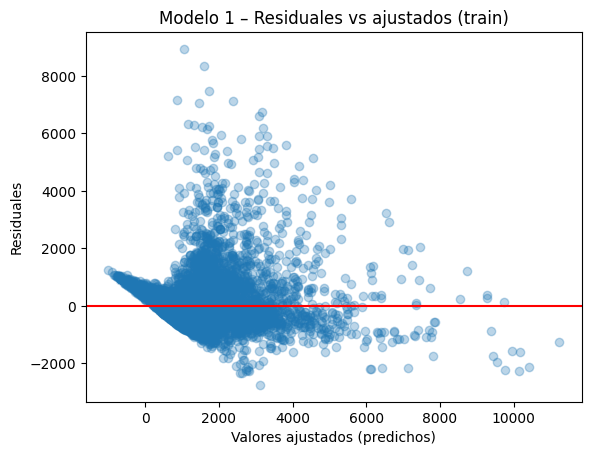

In [ ]:
plt.scatter(y_train_pred1, res_train_1, alpha=0.3)
plt.axhline(0, color="red")
plt.xlabel("Valores ajustados (predichos)")
plt.ylabel("Residuales")
plt.title("Modelo 1 – Residuales vs ajustados (train)")
plt.show()


10. Histograma de residuales (train)

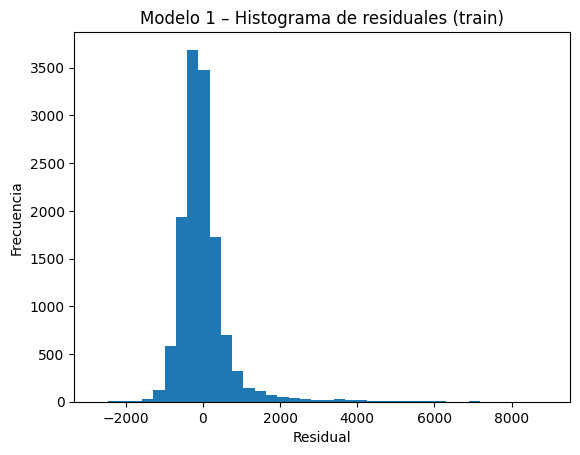

In [ ]:
plt.hist(res_train_1, bins=40)
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.title("Modelo 1 – Histograma de residuales (train)")
plt.show()


11. QQ-plot de residuales (train)


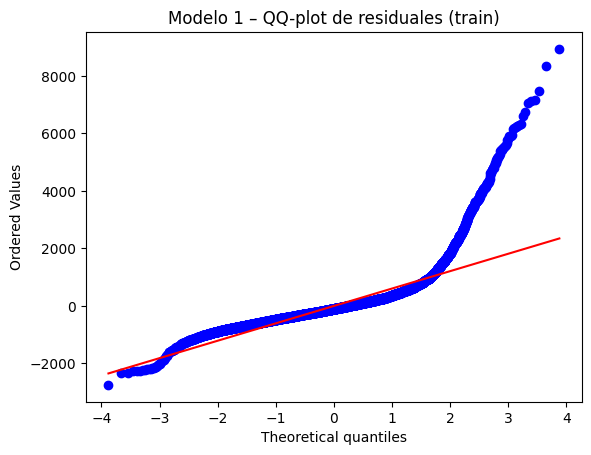

In [ ]:
stats.probplot(res_train_1, dist="norm", plot=plt)
plt.title("Modelo 1 – QQ-plot de residuales (train)")
plt.show()


12. Prueba de normalidad Shapiro-Wilk (train)

In [ ]:
muestra_res1 = res_train_1.sample(500, random_state=42) if len(res_train_1) > 500 else res_train_1

shapiro_stat, shapiro_p = stats.shapiro(muestra_res1)

print("Shapiro-Wilk (Modelo 1, residuales train):")
print("Estadístico:", shapiro_stat)
print("p-valor:", shapiro_p)


Shapiro-Wilk (Modelo 1, residuales train):
Estadístico: 0.7882571400603556
p-valor: 5.645721814991733e-25


13. Preparar variable objetivo transformada (log(price))

In [ ]:
y_log = np.log(data_model["price"])

X_model2 = X_model.copy()  # mismas X

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_model2, y_log, test_size=0.2, random_state=42
)

X_train2.shape, X_test2.shape


((13216, 26), (3305, 26))

14. Entrenar Modelo 2 (regresión sobre log(price))

In [ ]:
modelo2 = LinearRegression()
modelo2.fit(X_train2, y_train2)

y_train_pred2 = modelo2.predict(X_train2)
y_test_pred2 = modelo2.predict(X_test2)

mae_train_2 = mean_absolute_error(y_train2, y_train_pred2)
rmse_train_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
r2_train_2 = r2_score(y_train2, y_train_pred2)

mae_test_2 = mean_absolute_error(y_test2, y_test_pred2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
r2_test_2 = r2_score(y_test2, y_test_pred2)

print("=== Modelo 2: log(price) ===")
print("Train - MAE:", mae_train_2, " RMSE:", rmse_train_2, " R2:", r2_train_2)
print("Test  - MAE:", mae_test_2, " RMSE:", rmse_test_2, " R2:", r2_test_2)


=== Modelo 2: log(price) ===
Train - MAE: 0.3017129768405194  RMSE: 0.41095237143637015  R2: 0.6513925724945099
Test  - MAE: 0.2974191641257415  RMSE: 0.40700173883750274  R2: 0.6511111122618454


In [ ]:
# === Guardar modelo de regresión y columnas usadas ===

# Guardamos el modelo 2 (log(price))
joblib.dump(modelo2, "modelo_regresion.pkl")

# Guardamos la lista de columnas de X_model2 para reproducir el input en el tablero
joblib.dump(X_model2.columns.tolist(), "columnas_regresion.pkl")

print("Modelo de regresión y columnas guardados como:")
print(" - modelo_regresion.pkl")
print(" - columnas_regresion.pkl")


15. Residuales del Modelo 2 (train)


In [ ]:
res_train_2 = y_train2 - y_train_pred2

print("Resumen de residuales (Modelo 2, train):")
print(res_train_2.describe())


Resumen de residuales (Modelo 2, train):
count    1.321600e+04
mean     1.630388e-16
std      4.109679e-01
min     -2.346361e+00
25%     -2.364873e-01
50%      4.404086e-03
75%      2.088803e-01
max      2.552719e+00
Name: price, dtype: float64


16. Residuales vs ajustados (Modelo 2)

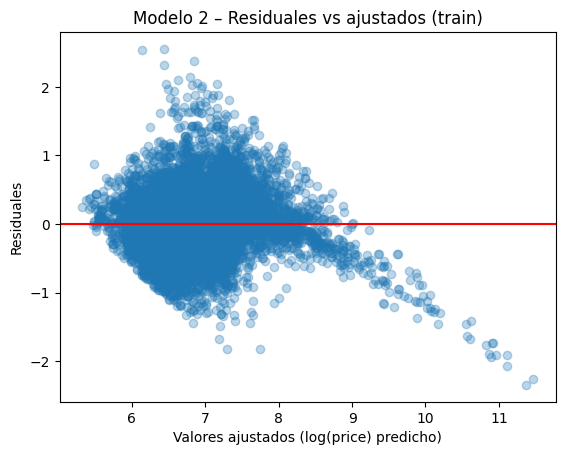

In [ ]:
plt.scatter(y_train_pred2, res_train_2, alpha=0.3)
plt.axhline(0, color="red")
plt.xlabel("Valores ajustados (log(price) predicho)")
plt.ylabel("Residuales")
plt.title("Modelo 2 – Residuales vs ajustados (train)")
plt.show()


17. Histograma de residuales (Modelo 2)


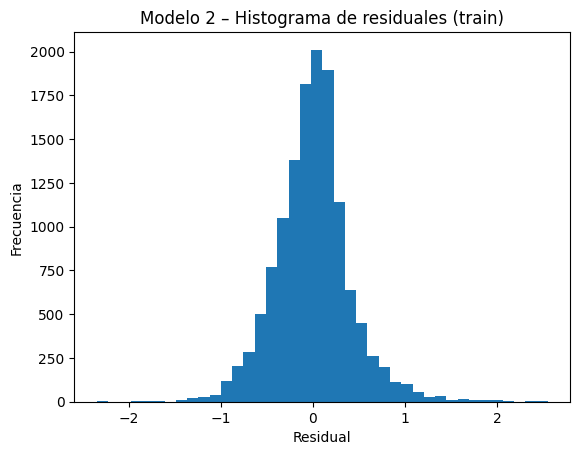

In [ ]:
plt.hist(res_train_2, bins=40)
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.title("Modelo 2 – Histograma de residuales (train)")
plt.show()


18. QQ-plot + Shapiro para Modelo 2

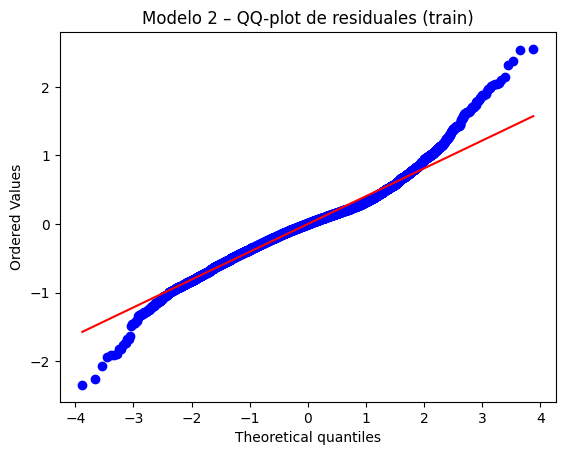

Shapiro-Wilk (Modelo 2, residuales train):
Estadístico: 0.9859649181421054
p-valor: 9.53757150840693e-05


In [ ]:
stats.probplot(res_train_2, dist="norm", plot=plt)
plt.title("Modelo 2 – QQ-plot de residuales (train)")
plt.show()

muestra_res2 = res_train_2.sample(500, random_state=42) if len(res_train_2) > 500 else res_train_2
shapiro_stat2, shapiro_p2 = stats.shapiro(muestra_res2)

print("Shapiro-Wilk (Modelo 2, residuales train):")
print("Estadístico:", shapiro_stat2)
print("p-valor:", shapiro_p2)


19. Comparación de desempeño entre Modelo 1 y Modelo 2

In [ ]:
resultados = pd.DataFrame({
    "Modelo": ["Modelo 1 (price)", "Modelo 2 (log(price))"],
    "R2_train": [r2_train_1, r2_train_2],
    "R2_test": [r2_test_1, r2_test_2],
    "RMSE_train": [rmse_train_1, rmse_train_2],
    "RMSE_test": [rmse_test_1, rmse_test_2],
    "MAE_train": [mae_train_1, mae_train_2],
    "MAE_test": [mae_test_1, mae_test_2]
})

resultados


,Modelo,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test
0,Modelo 1 (price),0.625312,0.604838,707.886863,714.425467,421.890025,426.857276
1,Modelo 2 (log(price)),0.651393,0.651111,0.410952,0.407002,0.301713,0.297419


20. Guardar resultados de los modelos a CSV


In [ ]:
resultados.to_csv("resultados_modelos_etapa4a.csv", index=False)
print("Resultados de los modelos guardados en resultados_modelos_etapa4a.csv")


Resultados de los modelos guardados en resultados_modelos_etapa4a.csv


In [ ]:
# ==== Variable binaria 'recomendable' y modelo de regresión logística ====

# Asegurarnos de que existe 'price_per_guest'
if "price_per_guest" not in df.columns:
    df["price_per_guest"] = df["price"] / df["accommodates"].replace(0, np.nan)

# Quitamos filas con price_per_guest nulo
df_log = df.dropna(subset=["price_per_guest"]).copy()

# Umbral: mediana de price_per_guest
umbral_ppg = df_log["price_per_guest"].median()
print("Mediana de price_per_guest:", umbral_ppg)

# Definición:
# 1 = recomendable (precio por huésped <= mediana)
# 0 = no recomendable (precio por huésped > mediana)
df_log["recomendable"] = np.where(df_log["price_per_guest"] <= umbral_ppg, 1, 0)

df_log[["price_per_guest", "recomendable"]].head()


Mediana de price_per_guest: 366.0


,price_per_guest,recomendable
0,1899.5000,0
1,292.5000,1
2,424.0000,0
3,502.0000,0
4,254.4375,1


In [ ]:
# Celda B2: Seleccionar variables explicativas para la regresión logística

features_log = [
    "price_per_guest",
    "accommodates",
    "availability_365",
    "estimated_occupancy_l365d",
    "host_is_superhost",
    "room_type",
    "neighbourhood_cleansed"
]

# Nos quedamos solo con las que existen realmente
features_log = [c for c in features_log if c in df_log.columns]
print("Variables usadas en la logística:", features_log)

X_log = df_log[features_log].copy()
y_log_bin = df_log["recomendable"]


Variables usadas en la logística: ['price_per_guest', 'accommodates', 'availability_365', 'estimated_occupancy_l365d', 'host_is_superhost', 'room_type', 'neighbourhood_cleansed']


In [ ]:
# Celda B3: Codificar variables categóricas y binarias

# host_is_superhost a 0/1 si viene como 't'/'f'
if "host_is_superhost" in X_log.columns:
    X_log["host_is_superhost"] = X_log["host_is_superhost"].map({"t": 1, "f": 0, 1: 1, 0: 0})

# One-hot encoding para room_type y barrio
cols_cat_log = []
for col in ["room_type", "neighbourhood_cleansed"]:
    if col in X_log.columns:
        cols_cat_log.append(col)

X_log = pd.get_dummies(X_log, columns=cols_cat_log, drop_first=True)

# Eliminar filas con NA en X o y
data_log = pd.concat([X_log, y_log_bin], axis=1).dropna()

X_log_model = data_log.drop(columns=["recomendable"])
y_log_model = data_log["recomendable"]

print("Tamaño final (logística):", X_log_model.shape)


Tamaño final (logística): (19152, 23)


In [ ]:
# Celda B4: Separar train/test y entrenar la regresión logística

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log_model, y_log_model, test_size=0.2, random_state=42, stratify=y_log_model
)

modelo_log = LogisticRegression(max_iter=2000, solver='liblinear')
modelo_log.fit(X_train_log, y_train_log)

# Predicciones y probabilidades
y_pred_log = modelo_log.predict(X_test_log)
y_proba_log = modelo_log.predict_proba(X_test_log)[:, 1]  # prob de clase 1


In [ ]:
# === Guardar modelo de clasificación y columnas usadas ===

joblib.dump(modelo_log, "modelo_clasificacion.pkl")
joblib.dump(X_log_model.columns.tolist(), "columnas_clasificacion.pkl")

print("Modelo de clasificación y columnas guardados como:")
print(" - modelo_clasificacion.pkl")
print(" - columnas_clasificacion.pkl")


In [ ]:
# Celda B5: Métricas de desempeño del modelo logístico

acc = accuracy_score(y_test_log, y_pred_log)
prec = precision_score(y_test_log, y_pred_log, pos_label=1)
rec = recall_score(y_test_log, y_pred_log, pos_label=1)
auc = roc_auc_score(y_test_log, y_proba_log)

print("=== Modelo de regresión logística: 'recomendable' ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("ROC-AUC:", auc)


=== Modelo de regresión logística: 'recomendable' ===
Accuracy: 0.9979117723831897
Precision: 0.9979155810317873
Recall: 0.9979155810317873
ROC-AUC: 0.9999779239099863


In [ ]:
# Celda B6: Matriz de confusión

cm = confusion_matrix(y_test_log, y_pred_log)
print("Matriz de confusión:\n", cm)


Matriz de confusión:
 [[1908    4]
 [   4 1915]]


In [ ]:
# ==== Guardar base actualizada con la columna 'recomendable' ====

# Verificar que 'df_log' tiene la columna 'recomendable'
if "recomendable" in df_log.columns:
    # Guardar dataset actualizado
    output_path = "listings_clean_con_recomendable.csv"
    df_log.to_csv(output_path, index=False)
    print(f"Archivo guardado correctamente como: {output_path}")
else:
    print("Advertencia: la columna 'recomendable' no existe en df_log.")


Archivo guardado correctamente como: listings_clean_con_recomendable.csv
